<h2>MNIST Digits - Kernel Functions</h2>

1. Load the entire MNIST digit dataset: [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/ "http://yann.lecun.com/exdb/mnist/"%29.

2. Choose two digit classes (e.g 7s and 3s) from the training data, and plot some of the examples.

3. Train a support vector classifier using each of the following kernels:

    - Linear
    - Poly
    - RBF
    

4. Report your training times on the dataset for the different kernels.

5. Report your error rates on the testing dataset for the different kernels.

    (If you encounter any issues with training time or memory issues, then you may use a reduced dataset, but carefully detail how you reduced the dataset.)

In [1]:
#import libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#import MNIST dataset
from six.moves import urllib
from sklearn.datasets import fetch_mldata

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [3]:
print(f"Size of MNIST digit dataset: {mnist['data'].shape}")

#take a peak at the MNIST dataset structure
mnist

Size of MNIST digit dataset: (70000, 784)


{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

Seven


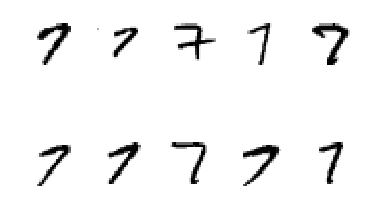

Two


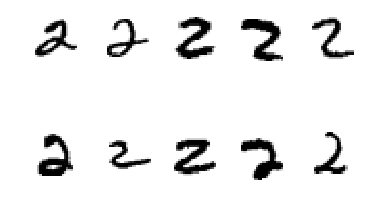

In [4]:
mnist_data, mnist_target = mnist['data'], mnist['target']

#filter out only 2 and 7 to be used for training
number_filter = np.where((mnist_target == 2 ) | (mnist_target == 7))
mnist_data, mnist_target = mnist_data[number_filter], mnist_target[number_filter]

def plot_digits(title, data):
    print(title)
    for index,image in enumerate(data[:10]):
        image = image.reshape(28,28)
        plt.subplot(2, 5, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
    
plot_digits('Seven',mnist_data[np.where(mnist_target == 7)])
plot_digits('Two',mnist_data[np.where(mnist_target == 2)])
    

In [5]:
from sklearn.model_selection import train_test_split

#split the dataset into training and testing data
X_train,X_test,y_train,y_test = train_test_split(mnist_data,mnist_target,test_size=0.3)

#check the dimensions of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9998, 784), (4285, 784), (9998,), (4285,))

In [6]:
def train_test_svm(svc, X_train, X_test, y_train, y_test, demo = False):
    '''
    Inputs: 
    - svc: Initialized svc instance.
    - demo: Boolean. If set to True, will print out outputs when running.
    
    Outputs: 
    - train_time: CPU processing training time (ms)
    - test_time: CPU processing testing time (ms)
    - train_score: Model score on the training data
    - test_score: Model score on the testing data
    '''
    
    #train model
    train_start = time.process_time()
    
    model = svc.fit(X_train, y_train) 
    
    train_stop = time.process_time()
    
    #test model
    test_start = time.process_time()
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    test_stop = time.process_time()
    
    #multiply recorded times by 1000 to get milliseconds
    train_time = (train_stop - train_start)*1000
    test_time = (test_stop - test_start)*1000
    
    if demo:
        print(f'Train time')
        print(f'CPU process time: {round(train_time,2)} ms')

        print(f'\nTest time')
        print(f'CPU process time: {round(test_time,2)} ms')

        print(f'Model score: {round(test_score,4)}')
        
    return train_time, test_time, train_score, test_score

In [ ]:
from sklearn.svm import SVC

kernels = ['linear','poly','rbf']

#create empty numpy array to store results
results = np.zeros([len(kernels),5])

#train and test SVCs with different kernels on MNIST data (2s and 7s)
for i in range(len(kernels)):
    
    #initiate the SVC classifier
    svc = SVC(kernel=kernels[i])
    
    #get the time taken for training & testing, and the model score
    train_time, test_time, train_score, test_score = train_test_svm(svc, X_train, X_test, y_train, y_test)
    
    #store results
    results[i,:] = i, round(train_time,2), round(test_time,2), round(train_score,4), round(test_score,4)


In [ ]:
df = pd.DataFrame(results, 
                  columns=['Kernels',
                           'Training CPU Processing Time (ms)',
                           'Testing CPU Processing Time (ms)',
                           'Training score',
                           'Testing score'])
df['Kernels'] = kernels
df

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.bar(df['Kernels'], df['Training CPU Processing Time (ms)'], label='Train time', alpha=0.7, width=0.5)
plt.bar(df['Kernels'], df['Testing CPU Processing Time (ms)'], label='Test time', alpha=0.8, width=0.5)
plt.xlabel('Kernel', size=15)
plt.ylabel('CPU Processing Time (ms)', size=15)
plt.title('Bar plot of CPU processing time (ms) across different kernels', size=15)
plt.legend()

plt.subplot(1,2,2)
plt.bar(df['Kernels'], df['Testing score'], label='Test Scores', alpha=0.8, width=0.5)
plt.xlabel('Kernel', size=15)
plt.ylabel('Test Score', size=15)
plt.title('Plot of Test Score across different kernels', size=15)
plt.legend()
plt.tight_layout()
plt.show()

<h2>Summary</h2>

The results show that the the linear kernel had the fastest testing time (3636 ms) on 4285 data points, while the polynomial kernel had the fastest training time (4499 ms) on 9998 data points. Since the difference between the linear and polynomial training and testing times are small (1-2 seconds), we can assume that the linear and polynomial kernels had roughly the same time for both training and testing.

The radial basis function (rbf) kernel 

Number of principle components: 8
Filtered Seven


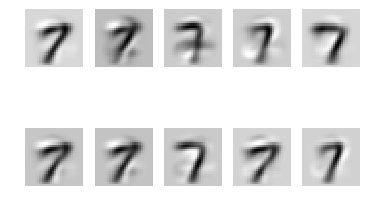

Filtered Two


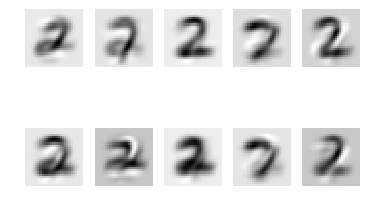

In [7]:
from sklearn.decomposition import PCA

#use PCA for filtering noise

#preserve 50% of the variance in the data
pca = PCA(0.50).fit(mnist_data)
print(f"Number of principle components: {pca.n_components_}")

components = pca.transform(mnist_data)
pca_data = pca.inverse_transform(components)

plot_digits('Filtered Seven', pca_data[np.where(mnist_target == 7)])
plot_digits('Filtered Two', pca_data[np.where(mnist_target == 2)])

In [8]:
#split the filtered dataset into training and testing data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(pca_data,mnist_target,test_size=0.8)

#check the dimensions of the datasets
pca_X_train.shape, pca_X_test.shape, pca_y_train.shape, pca_y_test.shape

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
train_test_svm(svc, pca_X_train, pca_X_test, pca_y_train, pca_y_test, demo = True)

In [ ]:
#split the filtered dataset into training and testing data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(pca_data,mnist_target,test_size=0.3)

#create empty numpy array to store results
pca_results = np.zeros([len(kernels),5])

#train and test SVCs with different kernels on MNIST data (2s and 7s)
for i in range(len(kernels)):
    
    #initiate the SVC classifier
    svc = SVC(kernel=kernels[i])
    
    #get the time taken for training & testing, and the model score
    train_time, test_time, train_score, test_score = train_test_svm(svc, pca_X_train, pca_X_test, pca_y_train, pca_y_test)
    
    #store results
    pca_results[i,:] = i, round(train_time,2), round(test_time,2), round(train_score,4), round(test_score,4)
    

In [ ]:
pca_df = pd.DataFrame(pca_results, 
                  columns=['Kernels',
                           'Training CPU Processing Time (ms)',
                           'Testing CPU Processing Time (ms)',
                           'Training score',
                           'Testing score'])
pca_df['Kernels'] = kernels
pca_df

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.bar(pca_df['Kernels'], pca_df['Training CPU Processing Time (ms)'], label='Train time', alpha=0.7, width=0.5)
plt.bar(pca_df['Kernels'], pca_df['Testing CPU Processing Time (ms)'], label='Test time', alpha=0.8, width=0.5)
plt.xlabel('Kernel', size=15)
plt.ylabel('CPU Processing Time (ms)', size=15)
plt.title('Bar plot of CPU processing time (ms) across different kernels', size=15)
plt.legend()

plt.subplot(1,2,2)
plt.bar(pca_df['Kernels'], pca_df['Testing score'], label='Test Scores', alpha=0.8, width=0.5)
plt.xlabel('Kernel', size=15)
plt.ylabel('Test Score', size=15)
plt.title('Plot of Test Score across different kernels', size=15)
plt.legend()
plt.tight_layout()
plt.show()